In [ ]:
# here we are reducing the demention of the data

In [1]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

In [5]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
48929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

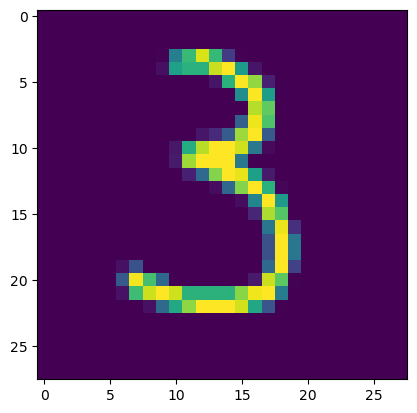

In [7]:
plt.imshow(df.iloc[47514,1:].values.reshape(28,28))

In [32]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
x_train.shape

(48000, 784)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(x_test)



In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9715

# step1 firt we will stander the data through standerd_scaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
x_train  = scaler.fit_transform(x_train)

In [36]:
x_test = scaler.transform(x_test)

##now we will apply PCA

In [26]:
# here we have given new eigion values and vector to the data and we had transform the data 

In [37]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=200)

In [38]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [39]:
x_train_trf.shape

(48000, 200)

In [40]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test_trf)

In [42]:
accuracy_score(y_test, y_pred)

0.9550833333333333

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf, y_train)
    y_pred = knn.predict(x_test_trf)
    print (accuracy_score(y_test, y_pred))
    

In [ ]:
# now here we will visualize the data 

In [ ]:
# transforming to a 2D coordinate system

In [44]:
pca = PCA(n_components = 2 )
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [45]:
x_train_trf

array([[ -0.0428691 ,  -1.92360488],
       [  8.15954044,  -4.49559024],
       [ -7.5048872 ,  -3.71910869],
       ...,
       [ 10.27731456,  -9.28657481],
       [ 10.29727511, -12.41246962],
       [ -2.87747741,  -0.81181664]])

In [47]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[:0],
                y = x_train_trf[:,1], 
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [48]:
# transform in 3D


In [49]:
pca = PCA(n_components = 3 )
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [50]:
x_train_trf

array([[ -0.04284916,  -1.92203268,  -2.50099664],
       [  8.15965666,  -4.49496441,  -4.74445026],
       [ -7.50489757,  -3.71935573,   5.1360716 ],
       ...,
       [ 10.27734344,  -9.28622276,  -1.82623054],
       [ 10.29728563, -12.41273468,   3.29342584],
       [ -2.87741485,  -0.81191815,  -1.4488109 ]])

In [51]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[:0],
                 y = x_train_trf[:,1],
                 z = x_train_trf[:,2],
                 color = y_train_trf )

fig.update_layout(
    margin = dict(l=20, r=20, t=20, b=20)
)
                 
               
                
fig.show()

TypeError: scatter() got an unexpected keyword argument 'z'